The dataset contains the following columns:

- Id: An identifier for each record.
- SepalLengthCm: The length of the sepal in centimeters.
- SepalWidthCm: The width of the sepal in centimeters.
- PetalLengthCm: The length of the petal in centimeters.
- PetalWidthCm: The width of the petal in centimeters.
- Species: The species of the Iris flower.

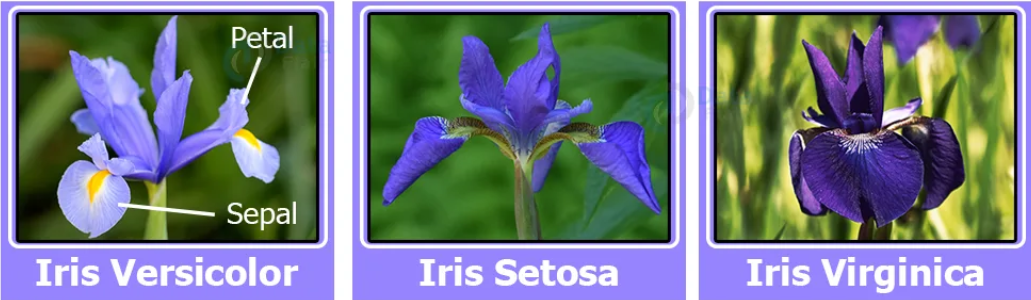

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
df.drop("Id", axis=1, inplace=True)

In [40]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [41]:
df.duplicated().sum()

3

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df['Species'].value_counts()

,count
Species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


# Visualize Dataset

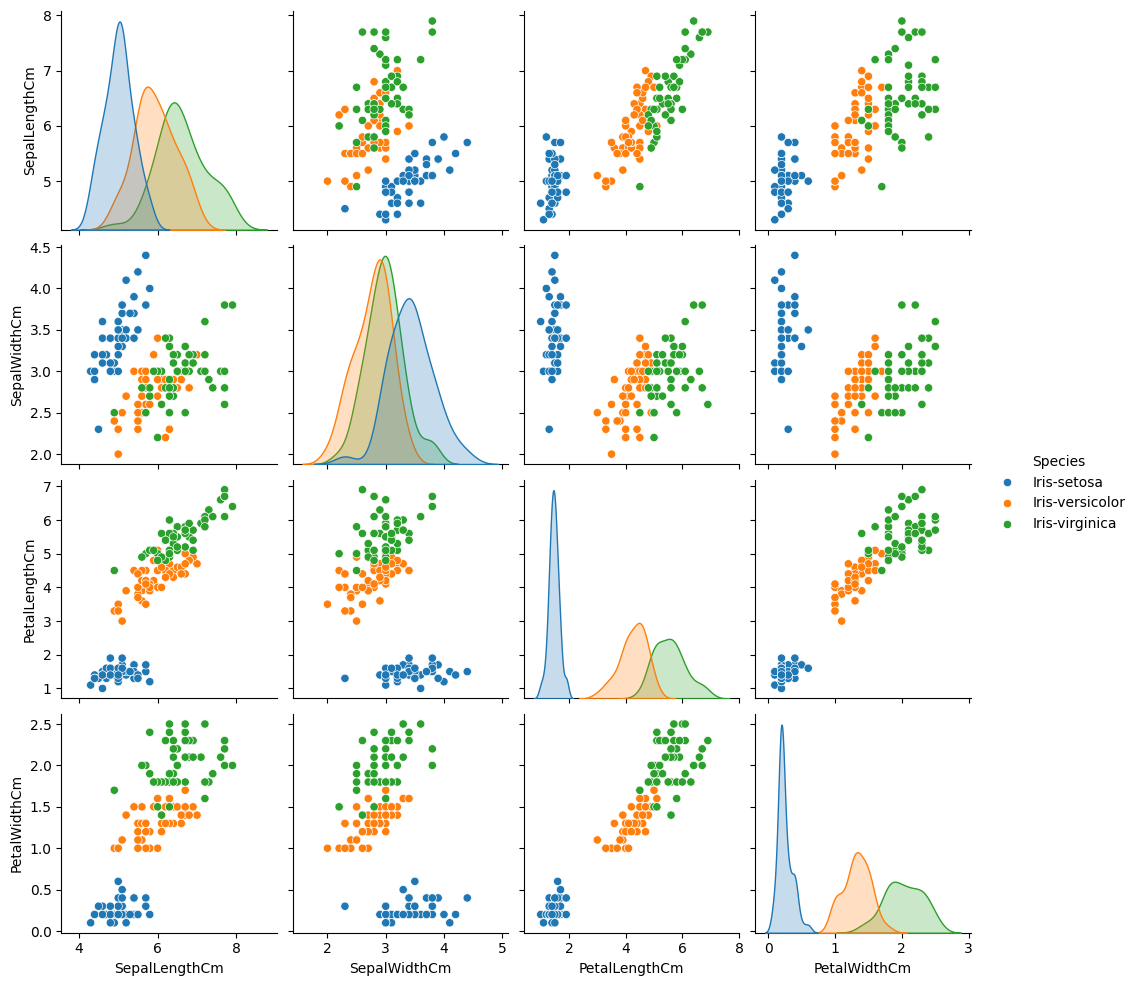

In [45]:
sns.pairplot(df, hue='Species')

Distribution of Numerical Variables

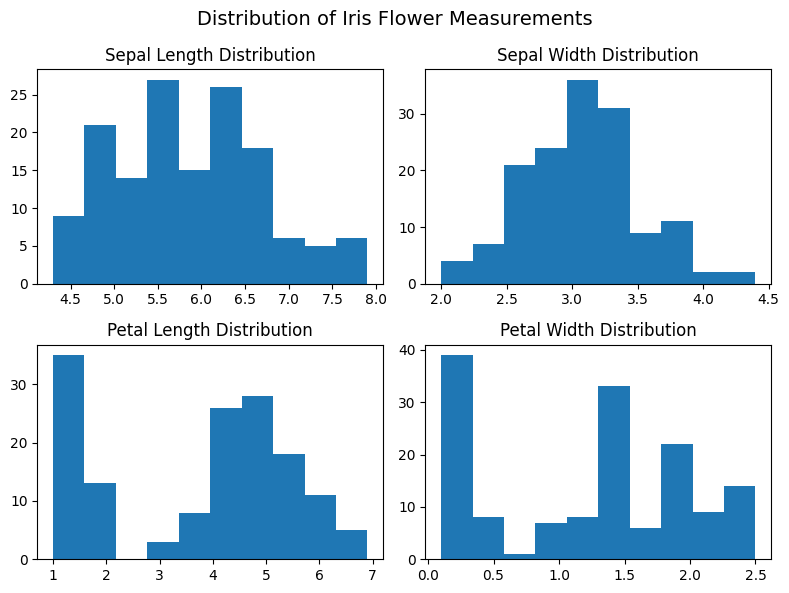

In [46]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

Correlation Heatmap

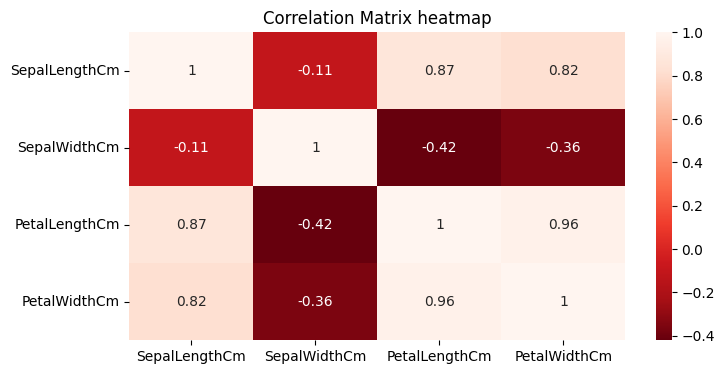

In [47]:
corr_matrix = df.drop(columns=["Species"]).corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

# Feature Engineering & Data Pre-processing

# 1. Categorical Encoding

In [48]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# 2. Data Scaling


In [49]:
x=df.drop(columns=['Species'], axis=1)
y=df['Species']

# 3. Data Splitting


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25)

In [51]:
y_train.value_counts()

,count
Species,
0,40
2,39
1,31


# Modeling

In [52]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [53]:
score = pd.DataFrame(columns=['Precision_train', 'Precision_test', 'Recall_train', 'Recall_test', 'Accuracy_train', 'Accuracy_test', 'F1_train', 'F1_test'])

# Using Logistic Regression


Confusion Matrix:


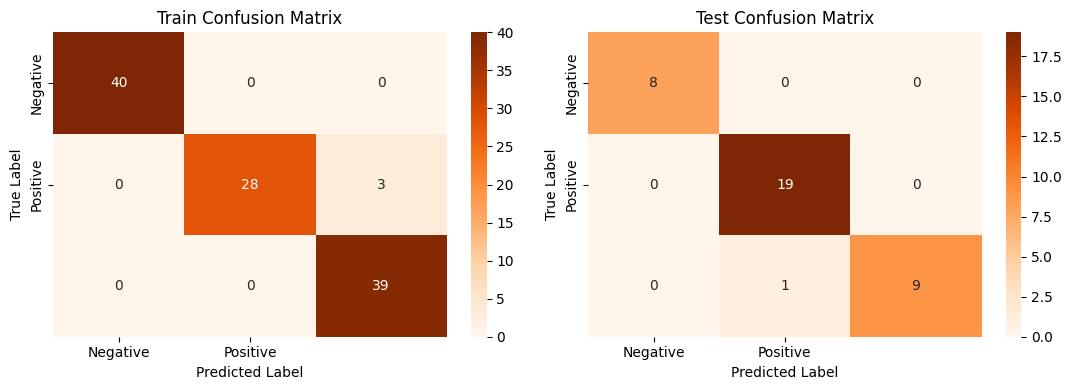


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  40        |
| 1            |    1        | 0.903226 |   0.949153 |  31        |
| 2            |    0.928571 | 1        |   0.962963 |  39        |
| accuracy     |    0.972727 | 0.972727 |   0.972727 |   0.972727 |
| macro avg    |    0.97619  | 0.967742 |   0.970705 | 110        |
| weighted avg |    0.974675 | 0.972727 |   0.972539 | 110        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  8        |
| 1            |    0.95     | 1        |   0.974359 | 19        |
| 2            |    1        | 0.9      |   0.947368 | 10        |
| accuracy     |    0.972973 | 0.972973 |   0.972973 |  0.9729

In [54]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
score.loc['Logistic Regression'] = lr_score

In [55]:
score.loc['Logistic Regression'] = lr_score
score

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
Logistic Regression,0.974675,0.974324,0.972727,0.972973,0.972727,0.972973,0.972539,0.972608


# Using Random Forest



Confusion Matrix:


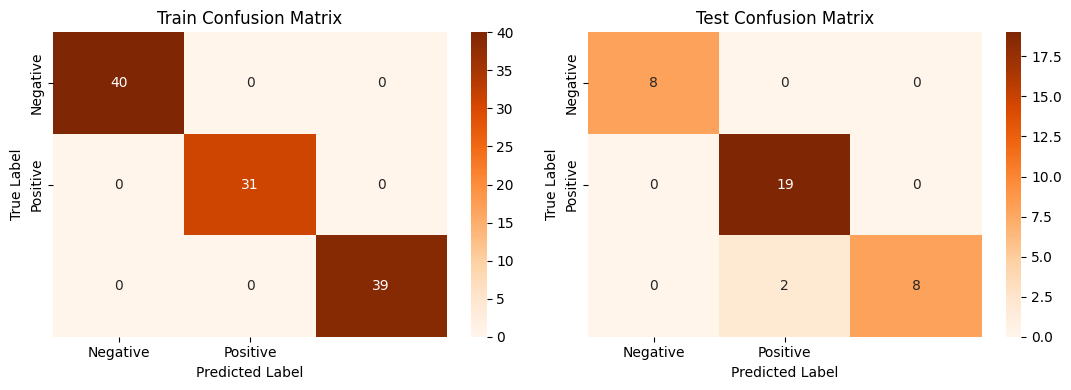


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        40 |
| 1            |           1 |        1 |          1 |        31 |
| 2            |           1 |        1 |          1 |        39 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       110 |
| weighted avg |           1 |        1 |          1 |       110 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  8        |
| 1            |    0.904762 | 1        |   0.95     | 19        |
| 2            |    1        | 0.8      |   0.888889 | 10        |
| accuracy     |    0.945946 | 0.945946 |   0.945946 |  0.945946 |
| m

In [56]:
rf_model = RandomForestClassifier()
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [57]:
score.loc['Random Forest'] = rf_score
score

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
Logistic Regression,0.974675,0.974324,0.972727,0.972973,0.972727,0.972973,0.972539,0.972608
Random Forest,1.000000,0.951094,1.000000,0.945946,1.000000,0.945946,1.000000,0.944294
